### Objective
* Data Analysis
* Building Model for Prediction
* Hyper-Parameter Tuning
* Deployment Basics

<hr>

In [1]:
import pandas as pd

In [10]:
data = pd.read_excel('/home/awantik/Downloads/default of credit card clients.xls')

In [11]:
columns = list(data.loc[0].values)

In [12]:
data = data[1:]

In [15]:
data.columns = columns

In [17]:
data.index = data.ID

In [19]:
data.drop(columns=['ID'], inplace=True)

In [20]:
data.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
9305,20000,1,2,2,30,0,0,0,0,0,...,17506,17924,18526,2546,1300,700,700,900,600,0
13465,20000,1,1,2,25,1,-2,-2,-2,-2,...,0,0,1000,0,0,0,0,1000,0,1
15444,80000,1,3,2,28,1,2,2,0,0,...,42614,86966,41950,2000,0,5000,1500,1500,7000,1
14748,60000,2,2,2,26,0,0,0,0,0,...,28170,28963,29456,2050,2011,1200,1400,1200,800,0
17998,360000,1,1,2,32,-2,-2,-2,-2,-2,...,-3,15866,-46,2303,21785,0,15869,0,0,0
6909,90000,2,1,1,31,1,2,-1,0,0,...,8978,1782,23173,39,33500,0,0,25000,0,0
10829,180000,2,4,2,26,0,0,0,0,0,...,5461,2309,0,8013,3060,109,46,0,0,0
27982,60000,2,3,2,28,0,0,0,0,0,...,35730,28670,27979,3376,1900,1908,1133,1015,1153,0
26073,400000,2,3,2,31,1,2,0,0,0,...,63928,52882,48387,3,10000,10023,20000,5000,20000,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null object
SEX                           30000 non-null object
EDUCATION                     30000 non-null object
MARRIAGE                      30000 non-null object
AGE                           30000 non-null object
PAY_0                         30000 non-null object
PAY_2                         30000 non-null object
PAY_3                         30000 non-null object
PAY_4                         30000 non-null object
PAY_5                         30000 non-null object
PAY_6                         30000 non-null object
BILL_AMT1                     30000 non-null object
BILL_AMT2                     30000 non-null object
BILL_AMT3                     30000 non-null object
BILL_AMT4                     30000 non-null object
BILL_AMT5                     30000 non-null object
BILL_AMT6                     30000 non-null object
PAY_AMT

### Prediction Objective
* We want to predict from this data if a person will default next month or not.

In [22]:
data.rename(columns={'default payment next month':'def_next_month'}, inplace=True)

In [24]:
data.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_next_month
ID,,,,,,,,,,,,,,,,,,,,,
12185,70000,2,2,1,32,0,0,0,0,0,...,63061,64403,64948,2303,2400,2500,2500,2300,2400,0
1048,140000,2,3,2,24,1,2,2,2,0,...,45422,46371,47297,3821,1775,0,1833,1850,2000,1
8998,80000,1,2,2,31,8,7,6,5,4,...,97622,88878,80518,0,0,0,0,0,0,0
12678,60000,2,2,2,25,0,0,0,0,0,...,23783,25548,21811,1482,2000,3000,3000,1500,2000,0
27164,10000,1,1,1,42,4,3,2,2,2,...,7975,7701,7787,0,0,2000,0,359,331,0


In [25]:
data.def_next_month.value_counts()

0    23364
1     6636
Name: def_next_month, dtype: int64

### Observation about target column
* The data contains imbalanced classes

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

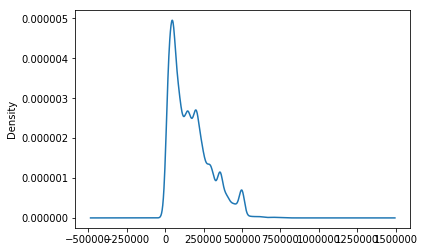

In [28]:
data.LIMIT_BAL.plot.kde()

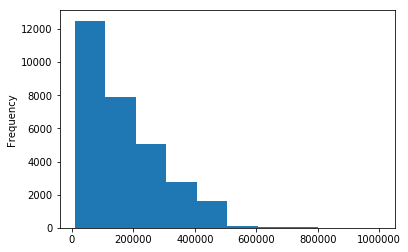

In [29]:
data.LIMIT_BAL.plot.hist()

In [30]:
data.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

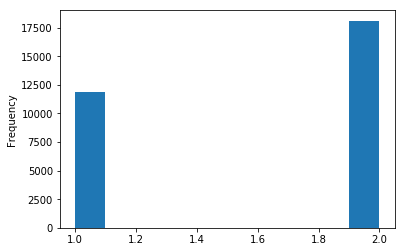

In [31]:
data.SEX.plot.hist()

In [32]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

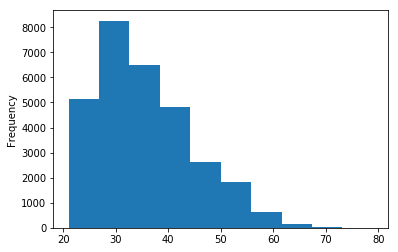

In [33]:
data.AGE.plot.hist()

In [38]:
payment_status = data.filter(regex='PAY_\d')

In [41]:
payment_status.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

<b> In columns PAY_0..5 0/-1/-2 represents payments done</b>
* Putting them all in same bucket, marking them 0. Since they paid
* -2,-1 means paid in advace

In [43]:
cols = list(payment_status.columns)

In [44]:
for col in cols:
    data[col] = data[col].map(lambda v: 0 if v < 0 else v)

In [47]:
data.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_next_month
ID,,,,,,,,,,,,,,,,,,,,,
28593,60000,2,2,1,42,0,0,0,0,0,...,56675,57550,57545,2579,2047,2024,2180,2321,2500,0
13684,430000,1,1,2,34,0,0,0,0,0,...,-3849,304425,293920,15000,70000,3116,313094,10300,15000,0
11397,50000,2,2,2,32,1,2,0,0,0,...,8838,9011,9872,0,3000,1000,1000,1000,1000,0
13532,260000,1,2,1,39,2,0,0,2,0,...,111037,95454,96370,7010,7004,15,3000,3000,3000,1
7105,390000,2,1,2,37,0,0,0,0,0,...,20666,10000,10000,20666,10000,20666,10000,10000,10500,0


### Baselining Model

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
trainX, testX, trainY, testY = train_test_split(data.drop(columns=['def_next_month']), data.def_next_month)

In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt.fit(trainX, trainY)

ValueError: Unknown label type: 'unknown'

In [54]:
trainY.unique()

array([0, 1], dtype=object)

In [55]:
for col in data.columns:
    print(data[col].unique())

[20000 120000 90000 50000 500000 100000 140000 200000 260000 630000 70000
 250000 320000 360000 180000 130000 450000 60000 230000 160000 280000
 10000 40000 210000 150000 380000 310000 400000 80000 290000 340000 300000
 30000 240000 470000 480000 350000 330000 110000 420000 170000 370000
 270000 220000 190000 510000 460000 440000 410000 490000 390000 580000
 600000 620000 610000 700000 670000 680000 430000 550000 540000 1000000
 530000 710000 560000 520000 750000 640000 16000 570000 590000 660000
 720000 327680 740000 800000 760000 690000 650000 780000 730000]
[2 1]
[2 1 3 5 4 6 0]
[1 2 3 0]
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
[2 0 1 3 4 8 7 5 6]
[2 0 3 5 7 4 1 6 8]
[0 2 3 4 6 7 1 5 8]
[0 2 3 4 5 7 6 1 8]
[0 2 3 5 4 7 8 6]
[0 2 3 6 4 7 8 5]
[3913 2682 29239 ... 1683 -1645 47929]
[3102 1725 14027 ... 3356 78379 48905]
[689 2682 13559 ... 2758 76304 4976

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL         30000 non-null object
SEX               30000 non-null object
EDUCATION         30000 non-null object
MARRIAGE          30000 non-null object
AGE               30000 non-null object
PAY_0             30000 non-null int64
PAY_2             30000 non-null int64
PAY_3             30000 non-null int64
PAY_4             30000 non-null int64
PAY_5             30000 non-null int64
PAY_6             30000 non-null int64
BILL_AMT1         30000 non-null object
BILL_AMT2         30000 non-null object
BILL_AMT3         30000 non-null object
BILL_AMT4         30000 non-null object
BILL_AMT5         30000 non-null object
BILL_AMT6         30000 non-null object
PAY_AMT1          30000 non-null object
PAY_AMT2          30000 non-null object
PAY_AMT3          30000 non-null object
PAY_AMT4          30000 non-null object
PAY_AMT5          30000 non-null object
PAY_AMT6         

In [60]:
for col in data.columns:
    data[col] = data[col].astype('int64')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
PAY_0             30000 non-null int64
PAY_2             30000 non-null int64
PAY_3             30000 non-null int64
PAY_4             30000 non-null int64
PAY_5             30000 non-null int64
PAY_6             30000 non-null int64
BILL_AMT1         30000 non-null int64
BILL_AMT2         30000 non-null int64
BILL_AMT3         30000 non-null int64
BILL_AMT4         30000 non-null int64
BILL_AMT5         30000 non-null int64
BILL_AMT6         30000 non-null int64
PAY_AMT1          30000 non-null int64
PAY_AMT2          30000 non-null int64
PAY_AMT3          30000 non-null int64
PAY_AMT4          30000 non-null int64
PAY_AMT5          30000 non-null int64
PAY_AMT6          30000 non-null 

In [63]:
trainX, testX, trainY, testY = train_test_split(data.drop(columns=['def_next_month']), data.def_next_month)

In [64]:
dt = DecisionTreeClassifier()

In [65]:
dt.fit(trainX, trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
dt.score(testX,testY)

0.7221333333333333

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
y_pred = dt.predict(testX)

In [70]:
confusion_matrix(y_pred=y_pred, y_true=testY)

array([[4728, 1075],
       [1009,  688]])

In [71]:
pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=testY), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,4728,1075
Actual 1,1009,688


* What we understand from the above matrix is 1009 defaulters were not predicted, they will skip the checks & scrutiny of the bank
* In this data, out of 1009+688=1697 defaulters, we missed predicting 1009 which is very bad
* We are able to catch only 40% defaulters

In [73]:
688/1697

0.40542133176193285

In [74]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [75]:
smote = SMOTE()

In [76]:
feature_s, target_s = smote.fit_sample(data.drop(columns=['def_next_month']), data.def_next_month)

In [77]:
trainX, testX, trainY, testY = train_test_split(feature_s, target_s)

In [78]:
dt = DecisionTreeClassifier()

In [79]:
dt.fit(trainX, trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [81]:
y_pred = dt.predict(testX)

In [82]:
pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=testY), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,4244,1617
Actual 1,1440,4381


In [83]:
dt.score(testX, testY)

0.7383153569594247

In [85]:
4381/(1440+4381)

0.7526198247723759

* The model now can predict 75% of defaulters

### Improving further

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=3)

In [88]:
rf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [89]:
y_pred = rf.predict(testX)

In [90]:
pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=testY), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,4987,874
Actual 1,1079,4742


In [92]:
4742/(1079+4742)

0.8146366603676344

* Feature Selection

In [96]:
feature_cols = list(data.drop(columns=['def_next_month']).columns)

In [98]:
feature_imp = pd.Series(rf.feature_importances_, index= feature_cols)

In [104]:
top_features = list(feature_imp.sort_values(ascending=False)[:-5].index)

In [105]:
top_features

['PAY_0',
 'BILL_AMT1',
 'LIMIT_BAL',
 'AGE',
 'PAY_AMT1',
 'PAY_AMT2',
 'BILL_AMT2',
 'PAY_2',
 'PAY_AMT3',
 'BILL_AMT3',
 'BILL_AMT4',
 'PAY_AMT6',
 'PAY_AMT4',
 'BILL_AMT6',
 'BILL_AMT5',
 'PAY_AMT5',
 'SEX',
 'MARRIAGE']

In [106]:
feature_s, target_s = smote.fit_sample(data[top_features], data.def_next_month)

In [112]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs=3)

In [113]:
rf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=3, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [114]:
rf.score(testX,testY)

0.8342749529190208

In [115]:
y_pred = rf.predict(testX)

In [116]:
pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=testY), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,4974,887
Actual 1,1049,4772


In [117]:
4772/(1049+4772)

0.81979041401821

### Hyper-parameters - Configuration of model, in random forest n_estimators
* Should I config n_estimators as 100,1000 or what
* With Hyper-parameter tuning we will try to fig out best configuration of ML algo

### We will understand - F1 Score. Recall